<a href="https://colab.research.google.com/github/Evangenajohn/Student-Depression-Classification/blob/main/Student_Depression_Classification_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation (used later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

# Load CSV file (change file name if needed)
df = pd.read_csv('student_depression_dataset.csv')

# Display shape and preview
print("Shape:", df.shape)
df.head()

Saving student_depression_dataset.csv to student_depression_dataset (2).csv
Shape: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

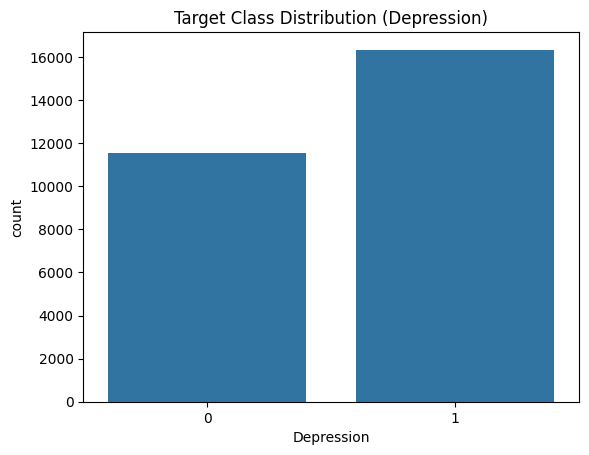

In [9]:
# Basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# View target class balance
print("\nClass Distribution:\n", df['Depression'].value_counts())
sns.countplot(data=df, x='Depression')
plt.title('Target Class Distribution (Depression)')
plt.show()

In [10]:
# Class distribution with labels
class_counts = df['Depression'].value_counts()
class_labels = {1: 'Depressed', 0: 'Not Depressed'}

for label, count in class_counts.items():
    print(f"{class_labels[label]} ({label}): {count} students ({(count / len(df)) * 100:.2f}%)")

Depressed (1): 16336 students (58.55%)
Not Depressed (0): 11565 students (41.45%)


In [11]:
# 'id' is not useful for prediction, and 'City' has too many unique values
df.drop(['id', 'City'], axis=1, inplace=True)

In [65]:
# Preview raw values from the original dataset before any conversion
print(df['Sleep Duration'].unique()[:20]) # Changed df_raw to df

[nan]


In [67]:
import pandas as pd

# Reload original data (replace with actual filename if different)
df = pd.read_csv('student_depression_dataset.csv')

# Check raw values again
print(df['Sleep Duration'].unique()[:20])

["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


In [68]:
import numpy as np

# 1. Clean text
df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.strip().str.lower().str.replace('"', '').str.replace("'", '')

# 2. Define converter
def convert_sleep_duration(s):
    try:
        s = s.strip()
        if '-' in s:
            parts = s.replace('hours', '').split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        elif 'less than 5' in s:
            return 4.5
        elif 'more than 8' in s:
            return 8.5
        elif s.replace('hours', '').strip().isdigit():
            return float(s.replace('hours', '').strip())
    except Exception as e:
        print(f"Failed to parse value: {s}. Error: {e}")
        return np.nan
    return np.nan

# 3. Apply conversion
df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)

# 4. Check
print(df['Sleep Duration'].unique()[:20])
print("NaNs left:", df['Sleep Duration'].isnull().sum())

[5.5 4.5 7.5 8.5 nan]
NaNs left: 18


In [69]:
df['Sleep Duration'] = df.groupby('Profession')['Sleep Duration'].transform(lambda x: x.fillna(x.median()))

In [70]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5.5,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,4.5,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7.5,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5.5,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [71]:
cat_cols = df.select_dtypes(include=['object']).columns

# Initialize encoder
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,5.5,0,4,1,3.0,0,0,1
1,8,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,5.5,1,11,0,3.0,1,1,0
2,26,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,4.5,0,6,0,9.0,0,1,0
3,30,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,7.5,1,8,1,4.0,4,1,1
4,32,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,5.5,1,17,1,1.0,0,0,0


In [78]:
from scipy import stats

# Z-score method to identify outliers
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

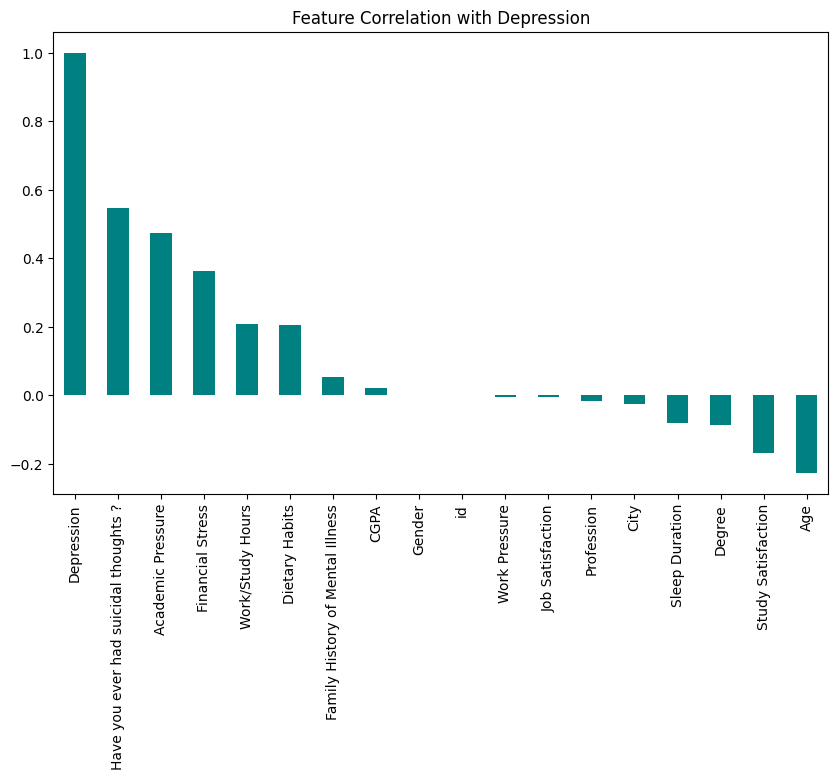

In [72]:
plt.figure(figsize=(10,6))
df.corr()['Depression'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Correlation with Depression")
plt.show()

In [73]:
# Target = Depression column
X = df.drop('Depression', axis=1)
y = df['Depression']

In [79]:
from sklearn.model_selection import train_test_split

# Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [84]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8427


In [85]:
from sklearn.metrics import classification_report

# Get detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581



In [86]:
import joblib

# Save your trained model
joblib.dump(model, 'depression_model.pkl')

['depression_model.pkl']

In [87]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [89]:
from google.colab import files

# Download model
files.download('depression_model.pkl')

# If you saved the scaler too
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>